In [37]:
import altair as alt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as ss
altair.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [2]:
carriers = pd.read_csv("carriers_US.csv") 

In [3]:
carriers_filtered = pd.DataFrame({'carrier_name': carriers['UNIQUE_CARRIER_NAME'],'ramp_minus_air': carriers['RAMP_TO_RAMP'] - carriers['AIR_TIME']})


In [4]:
print(carriers_filtered.head())

           carrier_name  ramp_minus_air
0  Delta Air Lines Inc.              75
1  Delta Air Lines Inc.              17
2  Delta Air Lines Inc.              22
3  Delta Air Lines Inc.              33
4  Delta Air Lines Inc.              18


In [5]:
carriers_filtered = carriers_filtered.groupby(['carrier_name']).mean()
print(carriers_filtered.head())

                                                    ramp_minus_air
carrier_name                                                      
40-Mile Air                                              25.355140
ABX Air Inc                                             233.427512
ADVANCED AIR, LLC                                        49.427549
Aerodynamics Inc. d/b/a SkyValue d/b/a SkyValue...       86.396825
Air Charter, Inc d/b/a Air Flamenco                      99.938525


In [6]:
carriers_filtered["ramp_minus_air"] = pd.to_numeric(carriers_filtered["ramp_minus_air"])

In [7]:
print(type(carriers_filtered))

<class 'pandas.core.frame.DataFrame'>


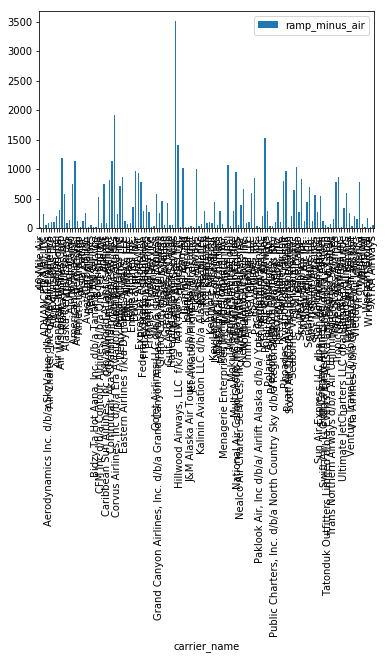

In [9]:
%matplotlib inline
carriers_filtered.plot(kind='bar')

In [13]:
# Load flight data from csv file.
flights = pd.read_csv("OTR_JAN2018.csv")

In [14]:
flights.head()

,MONTH,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,DEST_AIRPORT_ID,DEST,...,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,1,1/27/2018,UA,369,11697,FLL,"Fort Lauderdale, FL",FL,12266,IAH,...,0,173,174.0,148.0,966,NaN,NaN,NaN,NaN,NaN
1,1,1/27/2018,UA,368,14747,SEA,"Seattle, WA",WA,14771,SFO,...,0,133,119.0,98.0,679,NaN,NaN,NaN,NaN,NaN
2,1,1/27/2018,UA,367,11278,DCA,"Washington, DC",VA,12266,IAH,...,0,217,220.0,190.0,1208,NaN,NaN,NaN,NaN,NaN
3,1,1/27/2018,UA,366,12892,LAX,"Los Angeles, CA",CA,13930,ORD,...,0,240,241.0,212.0,1744,NaN,NaN,NaN,NaN,NaN
4,1,1/27/2018,UA,365,12451,JAX,"Jacksonville, FL",FL,11618,EWR,...,0,141,131.0,112.0,820,NaN,NaN,NaN,NaN,NaN


In [48]:
# check top 20 delayed flights

top_20 = flights.sort_values(by='ARR_DELAY', ascending=False)[:20]
top_20[['FL_DATE','OP_UNIQUE_CARRIER','ARR_DELAY','ORIGIN_CITY_NAME','DEST_CITY_NAME','CARRIER_DELAY', 'WEATHER_DELAY']]

,FL_DATE,OP_UNIQUE_CARRIER,ARR_DELAY,ORIGIN_CITY_NAME,DEST_CITY_NAME,CARRIER_DELAY,WEATHER_DELAY
472366,1/11/2018,AA,2023.0,"Eagle, CO","New York, NY",2007.0,0.0
483314,1/2/2018,AA,1778.0,"Norfolk, VA","Dallas/Fort Worth, TX",1752.0,0.0
141684,1/3/2018,HA,1717.0,"Honolulu, HI","New York, NY",35.0,1682.0
498049,1/3/2018,AA,1648.0,"Salt Lake City, UT","Dallas/Fort Worth, TX",0.0,0.0
468392,1/9/2018,AA,1537.0,"Kona, HI","Los Angeles, CA",1531.0,0.0
479862,1/9/2018,AA,1515.0,"Washington, DC","Dallas/Fort Worth, TX",1515.0,0.0
485341,1/11/2018,AA,1510.0,"Dayton, OH","Dallas/Fort Worth, TX",1510.0,0.0
389147,1/4/2018,YV,1486.0,"Fresno, CA","Phoenix, AZ",1469.0,0.0
83493,1/6/2018,B6,1473.0,"Aguadilla, PR","New York, NY",1125.0,0.0
104363,1/8/2018,EV,1454.0,"Roswell, NM","Dallas/Fort Worth, TX",1454.0,0.0


### Most delayed flight

The most delayed flight was almost 2000 minutes delayed, almost a day

In [29]:
# add a column DELAYED to have boolen values if a flight was delayed or not using lambda for ARR_DELAY > 0

flights['DELAYED'] = flights['ARR_DELAY'].apply(lambda x: x > 0)

In [31]:
flights.head()

,MONTH,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,DEST_AIRPORT_ID,DEST,...,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,delayed,DELAYED
0,1,1/27/2018,UA,369,11697,FLL,"Fort Lauderdale, FL",FL,12266,IAH,...,174.0,148.0,966,NaN,NaN,NaN,NaN,NaN,False,False
1,1,1/27/2018,UA,368,14747,SEA,"Seattle, WA",WA,14771,SFO,...,119.0,98.0,679,NaN,NaN,NaN,NaN,NaN,False,False
2,1,1/27/2018,UA,367,11278,DCA,"Washington, DC",VA,12266,IAH,...,220.0,190.0,1208,NaN,NaN,NaN,NaN,NaN,True,True
3,1,1/27/2018,UA,366,12892,LAX,"Los Angeles, CA",CA,13930,ORD,...,241.0,212.0,1744,NaN,NaN,NaN,NaN,NaN,False,False
4,1,1/27/2018,UA,365,12451,JAX,"Jacksonville, FL",FL,11618,EWR,...,131.0,112.0,820,NaN,NaN,NaN,NaN,NaN,False,False


In [41]:
# now check the percentage of flights delayed in Jan 2018

not_delayed = flights['DELAYED'].value_counts()[0] # first value of the result above
delayed = flights['DELAYED'].value_counts()[1] # second value of the result above
total_flights = not_delayed + delayed # total count of flights
float(delayed) / total_flights

0.3147348443655524

Almost 31 % of the flights were delayed in Jan 2018 , which is a bad season for flights due to winter storms.

In [49]:
# now chec how many were cancelledm using cancled column id dataframe with values 0 and 1

not_canceled, canceled = flights['CANCELLED'].value_counts()
float(canceled) / len(flights)

0.03011481833585328

Around 3 % of flights were cancelled

### Plot some data using our DELAYED column

In [88]:
# get boolean values of dleayed grouped with Airline Ids
group_by_carrier = flights.groupby(['OP_UNIQUE_CARRIER','DELAYED'])

group_by_carrier


In [89]:
# now unstack it to create new columns
count_delays_by_carrier = group_by_carrier.size().unstack()
count_delays_by_carrier

DELAYED,False,True
OP_UNIQUE_CARRIER,,
9E,13376,4858
AA,50840,22758
AS,11506,3806
B6,14497,10374
DL,54052,17202
EV,13764,6402
F9,6111,3596
G4,4353,2461
HA,4274,2353


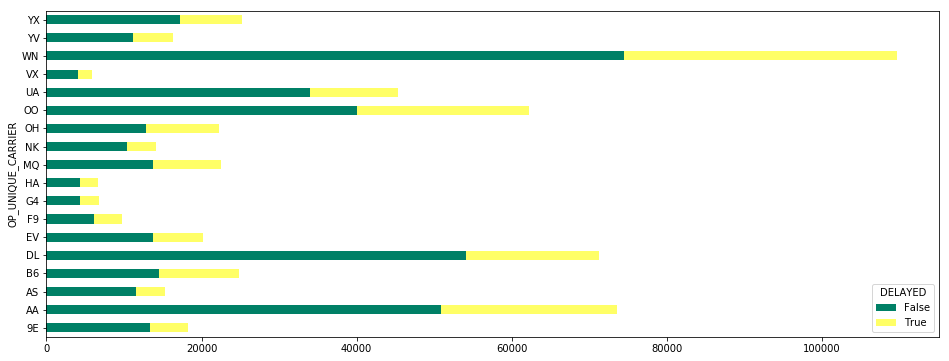

In [60]:
# plot the data in bar chart 
count_delays_by_carrier.plot(kind='barh', stacked=True, figsize=[16,6], colormap='summer')

Now lets try to find the reason of delays of flights and plot it day wise to see the variations.

In [67]:

delays_list = ['CARRIER_DELAY','WEATHER_DELAY','LATE_AIRCRAFT_DELAY','NAS_DELAY','SECURITY_DELAY'] # columns list
flight_delays_by_day = flights.pivot_table(index='FL_DATE', values=delays_list, aggfunc='sum') # Aggregate number of rows as values

,CARRIER_DELAY,LATE_AIRCRAFT_DELAY,NAS_DELAY,SECURITY_DELAY,WEATHER_DELAY
FL_DATE,,,,,
1/1/2018,136880.0,155361.0,37809.0,599.0,18837.0
1/10/2018,45381.0,57095.0,36526.0,63.0,6044.0
1/11/2018,71595.0,99789.0,50199.0,223.0,17692.0
1/12/2018,125558.0,203773.0,146492.0,126.0,40097.0
1/13/2018,61934.0,53856.0,19197.0,1589.0,11918.0
1/14/2018,49198.0,37150.0,24151.0,332.0,5392.0
1/15/2018,80142.0,131133.0,84229.0,148.0,25085.0
1/16/2018,60612.0,78379.0,47911.0,84.0,19327.0
1/17/2018,78300.0,179714.0,155100.0,145.0,95833.0


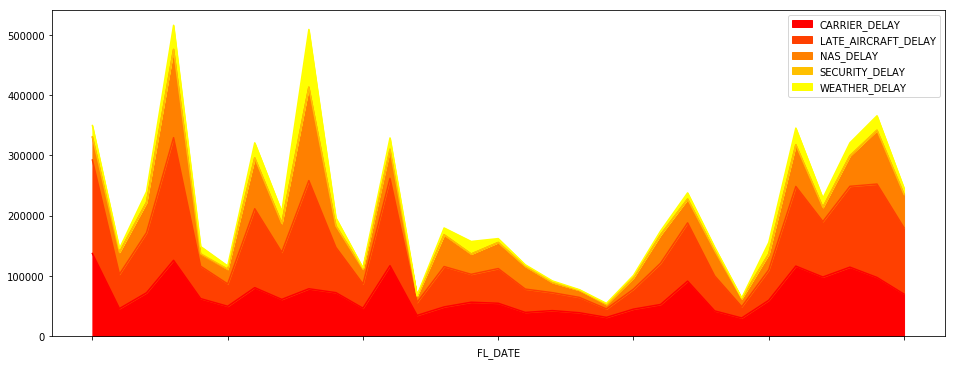

In [66]:
flight_delays_by_day.plot(kind='area', figsize=[16,6], stacked=True, colormap='autumn') # area plot

Now lets use the delays by carried DF to do some more analysis

In [69]:
# reset the index
delayed_by_carrier = flights.groupby(['OP_UNIQUE_CARRIER','DELAYED']).size().unstack().reset_index()
delayed_by_carrier[:10]

DELAYED,OP_UNIQUE_CARRIER,False,True
0,9E,13376,4858
1,AA,50840,22758
2,AS,11506,3806
3,B6,14497,10374
4,DL,54052,17202
5,EV,13764,6402
6,F9,6111,3596
7,G4,4353,2461
8,HA,4274,2353
9,MQ,13732,8770


In [70]:
# Create a new column for total flights
delayed_by_carrier['FLIGHTS_COUNT'] = (delayed_by_carrier[False] + delayed_by_carrier[True])
delayed_by_carrier[:10]

DELAYED,OP_UNIQUE_CARRIER,False,True,FLIGHTS_COUNT
0,9E,13376,4858,18234
1,AA,50840,22758,73598
2,AS,11506,3806,15312
3,B6,14497,10374,24871
4,DL,54052,17202,71254
5,EV,13764,6402,20166
6,F9,6111,3596,9707
7,G4,4353,2461,6814
8,HA,4274,2353,6627
9,MQ,13732,8770,22502


In [71]:
# create a proportion coloumn
delayed_by_carrier['PROPORTION_DELAYED'] = delayed_by_carrier[True] / delayed_by_carrier['FLIGHTS_COUNT']
delayed_by_carrier[:10]

DELAYED,OP_UNIQUE_CARRIER,False,True,FLIGHTS_COUNT,PROPORTION_DELAYED
0,9E,13376,4858,18234,0.266425
1,AA,50840,22758,73598,0.309220
2,AS,11506,3806,15312,0.248563
3,B6,14497,10374,24871,0.417112
4,DL,54052,17202,71254,0.241418
5,EV,13764,6402,20166,0.317465
6,F9,6111,3596,9707,0.370454
7,G4,4353,2461,6814,0.361168
8,HA,4274,2353,6627,0.355063
9,MQ,13732,8770,22502,0.389743


In [72]:
# check the most delayed flights
delayed_by_carrier.sort_values('PROPORTION_DELAYED', ascending=False)

DELAYED,OP_UNIQUE_CARRIER,False,True,FLIGHTS_COUNT,PROPORTION_DELAYED
11,OH,12843,9367,22210,0.421747
3,B6,14497,10374,24871,0.417112
9,MQ,13732,8770,22502,0.389743
6,F9,6111,3596,9707,0.370454
7,G4,4353,2461,6814,0.361168
12,OO,40027,22167,62194,0.356417
8,HA,4274,2353,6627,0.355063
15,WN,74503,35173,109676,0.320699
16,YV,11141,5212,16353,0.318718
5,EV,13764,6402,20166,0.317465


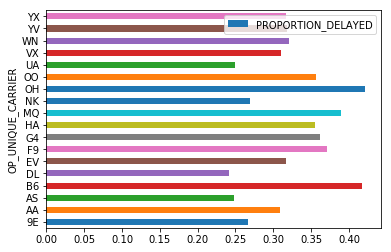

In [91]:
delayed_by_carrier.plot(x='OP_UNIQUE_CARRIER', y='PROPORTION_DELAYED', kind = 'barh')

Lets pick southwest for some analysis, as its my most preferred airline

In [80]:
southwest = flights[flights['OP_UNIQUE_CARRIER'] == 'WN']['ARR_DELAY']
southwest.describe()

count    107023.000000
mean          0.282154
std          27.337047
min         -73.000000
25%         -14.000000
50%          -6.000000
75%           6.000000
max         550.000000
Name: ARR_DELAY, dtype: float64

Avg delay is just 0.28 minutes, while longest was 550 minutes.
Lets check its distribution using histogram.
Since some delays are in negative we need to some adjustements for bin sizes and values.
From above we cans ee that most of the data should be captured between -50 and 100 minutes delaym, so we use that for bun values.

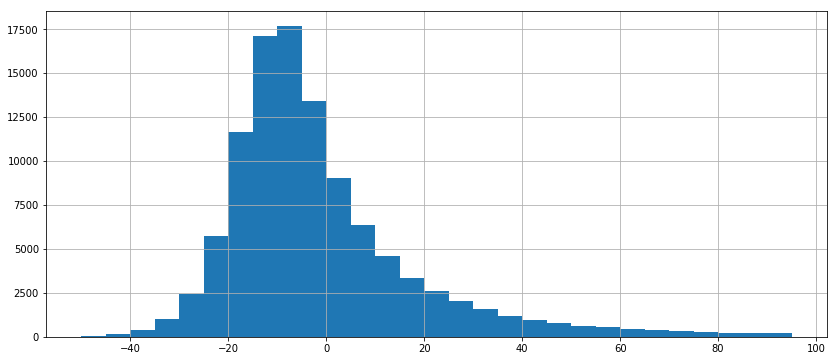

In [86]:
bin_values = np.arange(start=-50, stop=100, step=5)
southwest.hist(bins=bin_values, figsize=[14,6])

Looks like southwest is mostly before time or on time even during January winters.

Now lets compare two airlines with almost similar number of total flights.
Let take American 'AA' and Delta 'DL'

In [87]:
AA_DL_airlines_index = flights['OP_UNIQUE_CARRIER'].isin(['AA','DL']) # create index of flights from those airlines
AA_DL_airlines = flights[AA_DL_airlines_index] # select rows
group_carriers = AA_DL_airlines_index.groupby('OP_UNIQUE_CARRIER')['ARR_DELAY'] # group values by carrier, select minutes delayed
group_carriers.plot(kind='hist', bins=bin_values, figsize=[12,6], alpha=.4, legend=True) # alpha for transparency

KeyError: 'OP_UNIQUE_CARRIER'